In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

### 1. Outputs Overview

In [2]:
# Read the csv file
output = pd.read_csv('../output_analysis.csv', header=None)

# Set names and constants
output.columns = ["Number of handover reservations",
                  "Blocked Calls Rate (%)", "Dropped Calls Rate (%)"]

In [3]:
output_no_reservation = output[output["Number of handover reservations"] == 0] \
                                .reset_index(drop=True)
del output_no_reservation["Number of handover reservations"]
output_no_reservation

,Blocked Calls Rate (%),Dropped Calls Rate (%)
0,0.3270,0.5825
1,0.3850,0.5940
2,0.3555,0.6095
3,0.3380,0.5525
4,0.3610,0.6310
...,...,...
95,0.3425,0.5910
96,0.3655,0.6050
97,0.3855,0.5970
98,0.3710,0.6190


In [4]:
output_handover_reservation = output[output["Number of handover reservations"] == 1] \
                                .reset_index(drop=True)
del output_handover_reservation["Number of handover reservations"]
output_handover_reservation

,Blocked Calls Rate (%),Dropped Calls Rate (%)
0,1.0625,0.3455
1,1.1550,0.3355
2,1.1595,0.3435
3,1.0925,0.3505
4,1.1340,0.3325
...,...,...
95,1.1225,0.3540
96,1.1080,0.3215
97,1.0835,0.3420
98,1.1045,0.3520


### 2. Calculate average values and indicate statistical significance

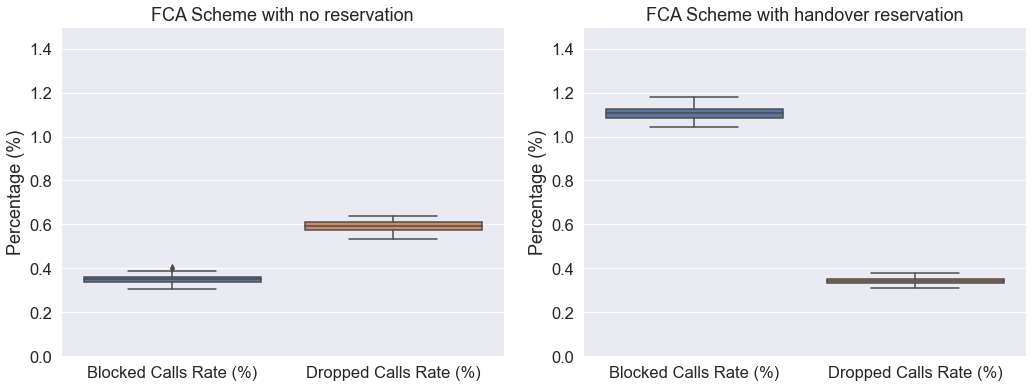

In [5]:
# Set the display
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(15, 6)}, font_scale=1.5)

# Set 2 subplots
fig, axs = plt.subplots(ncols=2)
fig.tight_layout(pad=2.0)

# Plot the simulation outputs for both 2 FCA schemes
sns.boxplot(data=output_no_reservation, ax=axs[0]) \
    .set(ylabel="Percentage (%)", ylim=(0, 1.5), title="FCA Scheme with no reservation")
sns.boxplot(data=output_handover_reservation, ax=axs[1]) \
    .set(ylabel="Percentage (%)", ylim=(0, 1.5), title="FCA Scheme with handover reservation")

plt.show()

In [6]:
blocked_rate_no_reservation = output_no_reservation['Blocked Calls Rate (%)']
dropped_rate_no_reservation = output_no_reservation['Dropped Calls Rate (%)']

# Calculate the mean and standard deviation
print("FCA SCHEME WITH NO RESERVATION")

print("-----Blocked Calls Rate (%)-----")
print("Mean: {:f}".format(blocked_rate_no_reservation.mean()))
print("Standard Deviation: {:f}".format(blocked_rate_no_reservation.std(ddof=1)))

print("-----Dropped Calls Rate (%)-----")
print("Mean: {:f}".format(dropped_rate_no_reservation.mean()))
print("Standard Deviation: {:f}".format(dropped_rate_no_reservation.std(ddof=1)))

FCA SCHEME WITH NO RESERVATION
-----Blocked Calls Rate (%)-----
Mean: 0.350885
Standard Deviation: 0.016781
-----Dropped Calls Rate (%)-----
Mean: 0.592345
Standard Deviation: 0.023145


In [7]:
blocked_rate_handover_reservation = output_handover_reservation['Blocked Calls Rate (%)']
dropped_rate_handover_reservation = output_handover_reservation['Dropped Calls Rate (%)']

# Calculate the mean and standard deviation
print("FCA SCHEME WITH HANDOVER RESERVATION")

print("-----Blocked Calls Rate (%)-----")
print("Mean: {:f}".format(blocked_rate_handover_reservation.mean()))
print("Standard Deviation: {:f}".format(blocked_rate_handover_reservation.std(ddof=1)))

print("-----Dropped Calls Rate (%)-----")
print("Mean: {:f}".format(dropped_rate_handover_reservation.mean()))
print("Standard Deviation: {:f}".format(dropped_rate_handover_reservation.std(ddof=1)))

FCA SCHEME WITH HANDOVER RESERVATION
-----Blocked Calls Rate (%)-----
Mean: 1.104285
Standard Deviation: 0.029926
-----Dropped Calls Rate (%)-----
Mean: 0.344410
Standard Deviation: 0.013829


### 3. Output Analysis

In [8]:
t = 1.66
n = 100

print("FCA SCHEME WITH NO RESERVATION")

print("-----Blocked Calls Rate (%)-----")
# Calculate the mean and standard deviation
mean1 = blocked_rate_no_reservation.mean()
std1 = blocked_rate_no_reservation.std(ddof=1)
delta1 = t*std1/(math.sqrt(n))
# Get the confidence interval
print("Half-width: {:f}".format(delta1))
print("Approximate 90% confidence interval: [{:f}, {:f}]".format(mean1 - delta1, mean1 + delta1))

print("-----Dropped Calls Rate (%)-----")
# Calculate the mean and standard deviation
mean2 = dropped_rate_no_reservation.mean()
std2 = dropped_rate_no_reservation.std(ddof=1)
delta2 = t*std2/(math.sqrt(n))
# Get the confidence interval
print("Half-width: {:f}".format(delta2))
print("Approximate 90% confidence interval: [{:f}, {:f}]".format(mean2 - delta2, mean2 + delta2))

FCA SCHEME WITH NO RESERVATION
-----Blocked Calls Rate (%)-----
Half-width: 0.002786
Approximate 90% confidence interval: [0.348099, 0.353671]
-----Dropped Calls Rate (%)-----
Half-width: 0.003842
Approximate 90% confidence interval: [0.588503, 0.596187]


In [9]:
t = 1.66
n = 100

print("FCA SCHEME WITH HANDOVER RESERVATION")

print("-----Blocked Calls Rate (%)-----")
# Calculate the mean and standard deviation
mean3 = blocked_rate_handover_reservation.mean()
std3 = blocked_rate_handover_reservation.std(ddof=1)
delta3 = t*std3/(math.sqrt(n))
# Get the confidence interval
print("Half-width: {:f}".format(delta3))
print("Approximate 90% confidence interval: [{:f}, {:f}]".format(mean3 - delta3, mean3 + delta3))

print("-----Dropped Calls Rate (%)-----")
# Calculate the mean and standard deviation
mean4 = dropped_rate_handover_reservation.mean()
std4 = dropped_rate_handover_reservation.std(ddof=1)
delta4 = t*std4/(math.sqrt(n))
# Get the confidence interval
print("Half-width: {:f}".format(delta4))
print("Approximate 90% confidence interval: [{:f}, {:f}]".format(mean4 - delta4, mean4 + delta4))

FCA SCHEME WITH HANDOVER RESERVATION
-----Blocked Calls Rate (%)-----
Half-width: 0.004968
Approximate 90% confidence interval: [1.099317, 1.109253]
-----Dropped Calls Rate (%)-----
Half-width: 0.002296
Approximate 90% confidence interval: [0.342114, 0.346706]


### 4. Comparisions between 2 FCA schemes

#### Blocked Calls rate

In [10]:
# Calculate the difference in Blocked Calls rate between 2 schemes
Z_r_blocked_rate = blocked_rate_no_reservation - blocked_rate_handover_reservation
data_blocked_rate = {"X_1r": blocked_rate_no_reservation,
                     "X_2r": blocked_rate_handover_reservation,
                     "Z_r": Z_r_blocked_rate}
df_blocked_rate = pd.DataFrame(data_blocked_rate)
df_blocked_rate

,X_1r,X_2r,Z_r
0,0.3270,1.0625,-0.7355
1,0.3850,1.1550,-0.7700
2,0.3555,1.1595,-0.8040
3,0.3380,1.0925,-0.7545
4,0.3610,1.1340,-0.7730
...,...,...,...
95,0.3425,1.1225,-0.7800
96,0.3655,1.1080,-0.7425
97,0.3855,1.0835,-0.6980
98,0.3710,1.1045,-0.7335


In [11]:
# Calculate the mean and standard deviation
mean5 = Z_r_blocked_rate.mean()
std5 = Z_r_blocked_rate.std(ddof=1)
# Get the confidence interval
t = 1.66
n = 100
delta5 = t*std5/(math.sqrt(n))

print("-----DIFFRENCE IN BLOCKED CALLS RATE-----")
print("Mean: {:f}".format(mean5))
print("Standard Deviation: {:f}".format(std5))
print("Half-width: {:f}".format(delta5))
print("Approximate 90% confidence interval: [{:f}, {:f}]".format(mean5 -delta5, mean5 + delta5))

-----DIFFRENCE IN BLOCKED CALLS RATE-----
Mean: -0.753400
Standard Deviation: 0.031760
Half-width: 0.005272
Approximate 90% confidence interval: [-0.758672, -0.748128]


The system with FCA scheme in which there is no reservation

is better because it completely has a lower Blocked Calls rate 

#### Dropped Calls rate

In [12]:
# Calculate the difference in Dropped Calls rate between 2 schemes
Z_r_dropped_rate = dropped_rate_no_reservation - dropped_rate_handover_reservation
data_dropped_rate = {"X_1r": dropped_rate_no_reservation,
                     "X_2r": dropped_rate_handover_reservation,
                     "Z_r": Z_r_dropped_rate}
data_dropped_rate = pd.DataFrame(data_dropped_rate)
data_dropped_rate

,X_1r,X_2r,Z_r
0,0.5825,0.3455,0.2370
1,0.5940,0.3355,0.2585
2,0.6095,0.3435,0.2660
3,0.5525,0.3505,0.2020
4,0.6310,0.3325,0.2985
...,...,...,...
95,0.5910,0.3540,0.2370
96,0.6050,0.3215,0.2835
97,0.5970,0.3420,0.2550
98,0.6190,0.3520,0.2670


In [13]:
# Calculate the mean and standard deviation
mean6 = Z_r_dropped_rate.mean()
std6 = Z_r_dropped_rate.std(ddof=1)
# Get the confidence interval
t = 1.66
n = 100
delta6 = t*std6/(math.sqrt(n))

print("-----DIFFRENCE IN DROPPED CALLS RATE-----")
print("Mean: {:f}".format(mean6))
print("Standard Deviation: {:f}".format(std6))
print("Half-width: {:f}".format(delta6))
print("Approximate 90% confidence interval: [{:f}, {:f}]".format(mean6 -delta6, mean6 + delta6))

-----DIFFRENCE IN DROPPED CALLS RATE-----
Mean: 0.247935
Standard Deviation: 0.027140
Half-width: 0.004505
Approximate 90% confidence interval: [0.243430, 0.252440]


The system with FCA scheme in which there is 1 channel reserved for call handover

is better because it completely has a lower Dropped Calls rate 

#### Comparisions FCA Schemes with different handover reservations

In [14]:
# Read the csv files
reservations = pd.read_csv("../reservations.csv", header=None)
reservations.columns = ['Number of handover reservations', \
                        'Blocked Calls rate (%)', 'Dropped Calls rate (%)']
reservations.head(10)

,Number of handover reservations,Blocked Calls rate (%),Dropped Calls rate (%)
0,0,0.3535,0.5910
1,1,1.0840,0.3415
2,2,2.6885,0.1745
3,3,5.5225,0.0735
4,4,10.3865,0.0255
5,5,17.4980,0.0020
6,6,27.3620,0.0005
7,7,39.9855,0.0000
8,8,55.2330,0.0000
9,9,73.4070,0.0000
